<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

idx = np.random.permutation(150)
X_train = X_train[idx]
y_onehot = y_onehot[idx]

X_train, X_test = X_train[:130], X_train[130:]
y_train, y_test = y_onehot[:130], y_onehot[130:]

EL algoritmo de backpropagation es lo principal para el entrenamiento de redes neuronales, este consta de 3 sub partes
\begin{itemize}
\item Hacer el forward pass
\item Calcular el error
\item Hacer backward pass
\end{itemize}



Algunas funciones utiles

In [82]:
def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def _sigmoid_derivative(x):
    sig = _sigmoid(x)
    return sig*(1. - sig )
def _relu(x):
    return np.maximum(0,x)
def _relu_derivative(x):
    return (x > 0).astype(int)

def _softmax(out_array):
    exp_ = np.exp(out_array)
    return exp_ / np.sum(exp_ ,axis = 1, keepdims = True)

def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1./m) * L_sum
    return L
def compute_mse(Y, Y_hat):
    m = Y.shape[0]
    return -(1./m) * np.sum(np.square(Y - Y_hat))

X = X_train.copy()
y = y_onehot.copy()
hddn1_n = 32
hddn2_n = 16
num_features = X.shape[1]
num_labels = y.shape[1]
num_examples = X.shape[0]


In [60]:
#layeri_weights_array --- liw
def forward_pass(X , architecture,activation):
    AUX = {}
    
    
    #print("X.s :"+str(X.shape))
    #print("W1: "+str(architecture["layer1_weights_array"].shape))
    

    AUX["Prod1"] = np.dot(X.T,architecture["layer1_weights_array"]) + architecture["layer1_biases_array"]
    if(activation == "relu"):
        AUX["Activation1"] = _relu(AUX["Prod1"])
    else:
        AUX["Activation1"] = _sigmoid(AUX["Prod1"])
    
    #print("A1.s :"+str(AUX["Activation1"].shape))
    #print("W2: "+str(architecture["layer2_weights_array"].shape))
    
    AUX["Prod2"] = np.dot(AUX["Activation1"],architecture["layer2_weights_array"]) + architecture["layer2_biases_array"]
    if(activation == "relu"):
        AUX["Activation2"] = _relu(AUX["Prod2"])
    else:
        AUX["Activation2"] = _sigmoid(AUX["Prod2"])
    
    
    #print("A2.s :"+str(AUX["Activation2"].shape))
    #print("W3: "+str(architecture["layer3_weights_array"].shape))
    
    AUX["Prod3"] = np.dot(AUX["Activation2"],architecture["layer3_weights_array"]) + architecture["layer3_biases_array"]
    AUX["Activation3"] = _softmax(AUX["Prod3"])
    #print("A1: "+str(AUX["Activation1"].shape))
    #print("A2: "+str(AUX["Activation2"].shape))
    #print("A3: "+str(AUX["Activation3"].shape))
    return AUX

def backward_pass(X,y, architecture, AUX,activation):
    dProd3 = AUX["Activation3"] - y
    
    #print(AUX["Activation3"].shape, y.shape)
    #print("dProd3: "+str(dProd3.shape))
    #print("A2: "+str(AUX["Activation2"].shape))
    dW3 = (1./num_labels) * np.dot(AUX["Activation2"].T, dProd3)
    db3 = (1./num_labels) * np.sum(dProd3, axis =0 ,keepdims=True)
    #print("dW3: "+str(dW3.shape))
    #print("db3: "+str(db3.shape))

    dA2 = np.dot(dProd3, architecture["layer3_weights_array"].T)
    #print(dA2.shape)
    if(activation == "relu"):
        dProd2 = dA2 * _relu_derivative(AUX["Prod2"])
    else :
        dProd2 = dA2 * _sigmoid_derivative(AUX["Prod2"])
    
    #print("dProd2: "+str(dProd2.shape))
    #print("A1: "+str(AUX["Activation1"].shape))
    dW2 = (1./num_labels) * np.dot(AUX["Activation1"].T, dProd2)
    db2 = (1./num_labels) * np.sum(dProd2, axis =0 ,keepdims=True)
    #print("dW2: "+str(dW2.shape))
    #print("db2: "+str(db2.shape))

    dA1 = np.dot(dProd2, architecture["layer2_weights_array"].T)
    if(activation == "relu"):
        dProd1 = dA1 * _relu_derivative(AUX["Prod1"])
    else :                                     
        dProd1 = dA1 * _sigmoid_derivative(AUX["Prod1"])
    #print("dProd1: "+str(dProd1.shape))
    #print("A1: "+str(AUX["Activation1"].shape))
    #print("A2: "+str(AUX["Activation2"].shape))
    #print("A3: "+str(AUX["Activation3"].shape))
    dW1 = (1./num_labels) * np.dot(X, dProd1)
    db1 = (1./num_labels) * np.sum(dProd1, axis =0 ,keepdims=True)
    #print("dW1: "+str(dW1.shape))
    #print("db1: "+str(db1.shape))

    gradients = {"dW1":dW1, "dW2":dW2, "dW3":dW3, "db1":db1, "db2":db2, "db3": db3}

    return gradients

In [61]:
def train(epoch,X,y,archi,acti,L):
    learning_rate = 1.0
    loss_t = []
    ax = []
    for i in range(epoch):
        #if(i % 100 == 0):
        #   print("epoch {}, reduccion {}".format(i,costo))
        #SGD con batch 1 a la vez aleatorio
        shuf = list(zip(X,y))
        np.random.shuffle(shuf)
        for xj,yj in shuf: # cantidad de ejemplos
            
            xj = xj.reshape(4,1)
            yj = yj.reshape(3,1).T
            #print("xj : "+str(xj.shape))
            #print("yj : "+str(yj.shape))
            #forward pass
                   
            AUX = forward_pass(xj, archi,acti)
            #CALCULO DE perdida
            if(L== "cross"):
                loss = compute_loss(yj, AUX["Activation3"])
            else:
                loss = compute_loss(yj, AUX["Activation3"])
            loss_t.append(loss)
            #backward pass
            gradients = backward_pass(xj,yj,archi,AUX,acti)
            
           
    
            #correcciones de sentido
            archi["layer1_weights_array"] = archi["layer1_weights_array"] - learning_rate * gradients["dW1"]
            archi["layer1_biases_array"] = archi["layer1_biases_array"] - learning_rate * gradients["db1"]

            archi["layer2_weights_array"] = archi["layer2_weights_array"] - learning_rate * gradients["dW2"]
            archi["layer2_biases_array"] = archi["layer2_biases_array"] - learning_rate * gradients["db2"]

            archi["layer3_weights_array"] = archi["layer3_weights_array"] - learning_rate * gradients["dW3"]
            archi["layer3_biases_array"] = archi["layer3_biases_array"] -learning_rate * gradients["db3"]
    
        #train_cost = compute_loss(y, AUX["Activation3"])

        print("Epoch {}: training cost = {}".format(i+1 ,np.average(loss_t)))
        ax.append(np.average(loss_t))
    return ax

def prediction(X_t, architecture,activation):
    lista = np.array([])
    for xi in X_t:
        dict1 = forward_pass(xi, architecture,activation)
        
        predicted_probability = np.argmax(dict1["Activation3"], axis=1)     
        lista= np.append(lista,predicted_probability).astype(np.int32)
    b=np.eye(3)[ lista.reshape(-1)]
           
    return b

In [70]:

architecture = {
"layer1_weights_array" : np.random.normal(0, 1, [num_features,hddn1_n]) ,
"layer1_biases_array" : np.zeros((1, hddn1_n)),

"layer2_weights_array" : np.random.normal(0, 1, [hddn1_n,hddn2_n]) ,
"layer2_biases_array" : np.zeros((1,hddn2_n)),

"layer3_weights_array" : np.random.normal(0, 1, [hddn2_n,num_labels]) ,
"layer3_biases_array" : np.zeros((1,num_labels))
}
%time loss_list = train(100,X,y,architecture,"sigmoid","cross")

Epoch 1: training cost = 0.7405490313881621
Epoch 2: training cost = 0.5200514667595093
Epoch 3: training cost = 0.41008640580237027
Epoch 4: training cost = 0.3396399525269564
Epoch 5: training cost = 0.3100929063933915
Epoch 6: training cost = 0.2867688868277639
Epoch 7: training cost = 0.2671525819125435
Epoch 8: training cost = 0.25321621226393204
Epoch 9: training cost = 0.2344458204849633
Epoch 10: training cost = 0.22498874339666583
Epoch 11: training cost = 0.21552016524959225
Epoch 12: training cost = 0.20624073762060866
Epoch 13: training cost = 0.19750722972888177
Epoch 14: training cost = 0.1882159086002004
Epoch 15: training cost = 0.18266444146019775
Epoch 16: training cost = 0.17851553817421772
Epoch 17: training cost = 0.17215841480999458
Epoch 18: training cost = 0.16579652234707776
Epoch 19: training cost = 0.16323297417875893
Epoch 20: training cost = 0.15855872926967213
Epoch 21: training cost = 0.1564750700202264
Epoch 22: training cost = 0.15353704391930353
Epoch 

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = prediction(X_test,architecture, "sigmoid")
print(classification_report(predictions, y_test))
predictions = prediction(X_train,architecture, "sigmoid")
print(classification_report(predictions, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.86      1.00      0.92         6
          2       1.00      0.88      0.93         8

avg / total       0.96      0.95      0.95        20

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      1.00      0.99        42
          2       1.00      0.98      0.99        44

avg / total       0.99      0.99      0.99       130



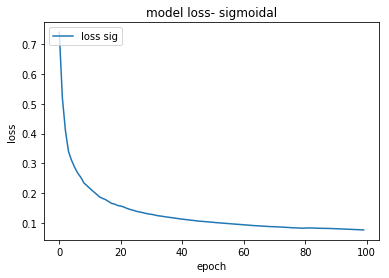

In [72]:
plt.plot(loss_list)

plt.title('model loss- sigmoidal')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss sig', 'loss relu'], loc='upper left')
plt.show()

In [73]:

architecture = {
"layer1_weights_array" : np.random.normal(0, 1, [num_features,hddn1_n]) ,
"layer1_biases_array" : np.zeros((1, hddn1_n)),

"layer2_weights_array" : np.random.normal(0, 1, [hddn1_n,hddn2_n]) ,
"layer2_biases_array" : np.zeros((1,hddn2_n)),

"layer3_weights_array" : np.random.normal(0, 1, [hddn2_n,num_labels]) ,
"layer3_biases_array" : np.zeros((1,num_labels))
}
%time loss_list2 = train(100,X,y,architecture,"sigmoid","mse")

Epoch 1: training cost = 0.7102699274824203
Epoch 2: training cost = 0.4983283023010449
Epoch 3: training cost = 0.4010296800299752
Epoch 4: training cost = 0.3421904656561419
Epoch 5: training cost = 0.30702522435716645
Epoch 6: training cost = 0.2854263066530063
Epoch 7: training cost = 0.2657548117661889
Epoch 8: training cost = 0.25445565981121315
Epoch 9: training cost = 0.23680140033577077
Epoch 10: training cost = 0.2238134771868024
Epoch 11: training cost = 0.21417899423856812
Epoch 12: training cost = 0.2050794471743961
Epoch 13: training cost = 0.1970732447275293
Epoch 14: training cost = 0.18934891354206
Epoch 15: training cost = 0.18231590301176614
Epoch 16: training cost = 0.17474176177132245
Epoch 17: training cost = 0.16959280215946654
Epoch 18: training cost = 0.16590464142399358
Epoch 19: training cost = 0.16193062202785308
Epoch 20: training cost = 0.15790743467867413
Epoch 21: training cost = 0.15391949515158584
Epoch 22: training cost = 0.15032807599463438
Epoch 23:

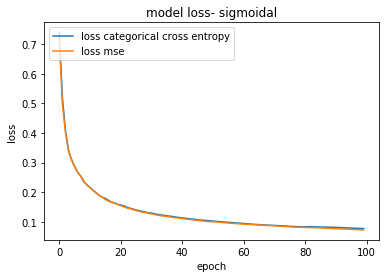

In [74]:
plt.plot(loss_list)
plt.plot(loss_list2)
plt.title('model loss- sigmoidal')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss categorical cross entropy', 'loss mse'], loc='upper left')
plt.show()

Para la activación sigmoidal, no se observan cambios que resalten a simple vista con diferentes tipos de función de perdida. Ya que estos varian respecto al lo aleatorio que se recorre el dataset cuando se hace gradiente, lo unico común es la monotonia del decresimiento entre ambas.

<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

In [75]:
from keras.models import Sequential
from keras.layers.core import Dense
modelsg = Sequential()
modelrl = Sequential()
modelsg.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
modelrl.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
modelsg.add(Dense(16, activation="sigmoid"))
modelrl.add(Dense(16, activation="relu"))
modelsg.add(Dense(3, activation="softmax"))
modelrl.add(Dense(3, activation="softmax"))

In [76]:
from keras.optimizers import SGD
modelsg.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
modelrl.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

In [77]:
%time m_sg = modelsg.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

Wall time: 12.6 s


In [78]:
%time m_rl = modelrl.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

Wall time: 12.5 s


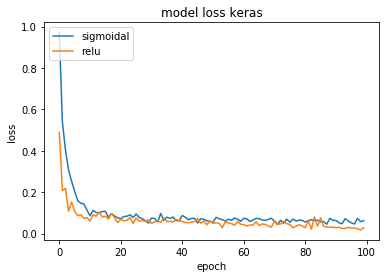

In [79]:
#print(m_sg.history.keys())
plt.plot(m_sg.history['loss'])
plt.plot(m_rl.history['loss'])

plt.title('model loss keras')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sigmoidal', 'relu'], loc='upper left')
plt.show()

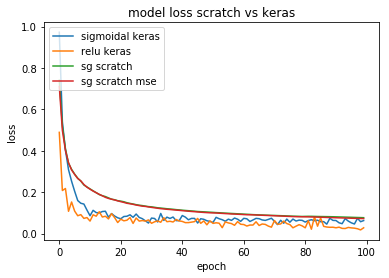

In [80]:
#print(m_sg.history.keys())
plt.plot(m_sg.history['loss'])
plt.plot(m_rl.history['loss'])
plt.plot(loss_list)
plt.plot(loss_list2)
plt.title('model loss scratch vs keras')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sigmoidal keras', 'relu keras','sg scratch','sg scratch mse'], loc='upper left')
plt.show()

Se puede apreciar que los modelos de keras presentan menor perdida en menos cantidad de epochs, debido a que las primeras perdidas son mayores, pero estos se ven más variantes con respecto a los scratch, debido a que keras debe usar alguna heuristica adicional lo cual aumenta su tiempo de ~3S que toma el scratch a ~13S que toma keras para explorar mejor el espacio de busqueda.

<a id="tercero"></a>
### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.


> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

In [ ]:
test_arch = {
"layer1_weights_array" : np.random.normal(0, 1, [num_features,hddn1_n]) ,
"layer1_biases_array" : np.zeros((1, hddn1_n)),

"layer2_weights_array" : np.random.normal(0, 1, [hddn1_n,hddn2_n]) ,
"layer2_biases_array" : np.zeros((1,hddn2_n)),

"layer3_weights_array" : np.random.normal(0, 1, [hddn2_n,num_labels]) ,
"layer3_biases_array" : np.zeros((1,num_labels))
}

In [ ]:
AUX = forward_pass(xj, test_arch,"sigmoid")
loss = compute_loss(yj, AUX["Activation3"])

<a id="cuarto"></a>
### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

In [56]:
def train_m(epoch,X,y,archi,acti,L):
    learning_rate = 0.1
    loss_t = []
    ax = []
    mu = 0.7  
    V_dW1 = np.zeros(archi["layer1_weights_array"].shape)
    V_db1 = np.zeros(archi["layer1_biases_array"].shape)
    V_dW2 = np.zeros(archi["layer2_weights_array"].shape)
    V_db2 = np.zeros(archi["layer2_biases_array"].shape)
    V_dW3 = np.zeros(archi["layer3_weights_array"].shape)
    V_db3 = np.zeros(archi["layer3_biases_array"].shape)
    for i in range(epoch):
        #if(i % 100 == 0):
        #   print("epoch {}, reduccion {}".format(i,costo))
        #SGD con batch 1 a la vez aleatorio
        shuf = list(zip(X,y))
        np.random.shuffle(shuf)
        for xj,yj in shuf: # cantidad de ejemplos
            
            xj = xj.reshape(4,1)
            yj = yj.reshape(3,1).T
            #print("xj : "+str(xj.shape))
            #print("yj : "+str(yj.shape))
            #forward pass
                   
            AUX = forward_pass(xj, archi,acti)
            #CALCULO DE perdida
            if(L== "cross"):
                loss = compute_loss(yj, AUX["Activation3"])
            else:
                loss = compute_loss(yj, AUX["Activation3"])
            loss_t.append(loss)
            #backward pass
            gradients = backward_pass(xj,yj,archi,AUX,acti)
            
            #adicion de momentum
            V_dW1 = (mu * V_dW1 - learning_rate * gradients["dW1"])
            V_db1 = (mu * V_db1 - learning_rate * gradients["db1"])
            V_dW2 = (mu * V_dW2 - learning_rate * gradients["dW2"])
            V_db2 = (mu * V_db2 - learning_rate * gradients["db2"])
            V_dW3 = (mu * V_dW3 - learning_rate * gradients["dW3"])
            V_db3 = (mu * V_db3 - learning_rate * gradients["db3"])
    
            #correcciones de sentido
            archi["layer1_weights_array"] = archi["layer1_weights_array"] + V_dW1
            archi["layer1_biases_array"] = archi["layer1_biases_array"] + V_db1

            archi["layer2_weights_array"] = archi["layer2_weights_array"] + V_dW2
            archi["layer2_biases_array"] = archi["layer2_biases_array"] + V_db2

            archi["layer3_weights_array"] = archi["layer3_weights_array"] + V_dW3
            archi["layer3_biases_array"] = archi["layer3_biases_array"] + V_db3
    
        #train_cost = compute_loss(y, AUX["Activation3"])

        print("Epoch {}: training cost = {}".format(i+1 ,np.average(loss_t)))
        ax.append(np.average(loss_t))
    return ax

In [81]:
architecture_m = {
"layer1_weights_array" : np.random.normal(0, 1, [num_features,hddn1_n]) ,
"layer1_biases_array" : np.zeros((1, hddn1_n)),

"layer2_weights_array" : np.random.normal(0, 1, [hddn1_n,hddn2_n]) ,
"layer2_biases_array" : np.zeros((1,hddn2_n)),

"layer3_weights_array" : np.random.normal(0, 1, [hddn2_n,num_labels]) ,
"layer3_biases_array" : np.zeros((1,num_labels))
}
%time loss_list_m = train_m(100,X_train,y_train,architecture_m,"sigmoid","cross")

Epoch 1: training cost = 0.7967036446152799
Epoch 2: training cost = 0.5403885025279725
Epoch 3: training cost = 0.4270855201686934
Epoch 4: training cost = 0.35791503803764024
Epoch 5: training cost = 0.3078365789417474
Epoch 6: training cost = 0.2756182923357248
Epoch 7: training cost = 0.2504013590476216
Epoch 8: training cost = 0.23389570762263906
Epoch 9: training cost = 0.21677137421834491
Epoch 10: training cost = 0.20335504166861054
Epoch 11: training cost = 0.1945440694932884
Epoch 12: training cost = 0.18968074430540574
Epoch 13: training cost = 0.18096843628724757
Epoch 14: training cost = 0.17360621347847344
Epoch 15: training cost = 0.16705107922612278
Epoch 16: training cost = 0.16139106457198135
Epoch 17: training cost = 0.15649992709972071
Epoch 18: training cost = 0.15197492311606495
Epoch 19: training cost = 0.148694263291172
Epoch 20: training cost = 0.14510994076621758
Epoch 21: training cost = 0.14287117152991313
Epoch 22: training cost = 0.13992946101602158
Epoch 

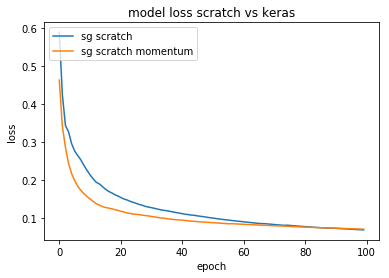

In [58]:
#print(m_sg.history.keys())
plt.plot(loss_list)
plt.plot(loss_list_m)
plt.title('model loss scratch vs keras')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sg scratch','sg scratch momentum'], loc='upper left')
plt.show()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = prediction(X_test,architecture_m, "sigmoid")
print(classification_report(predictions, y_test))
predictions = prediction(X_train,architecture_m, "sigmoid")
print(classification_report(predictions, y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.86      1.00      0.92         6
          2       1.00      0.88      0.93         8

avg / total       0.96      0.95      0.95        20

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       0.98      1.00      0.99        42
          2       1.00      0.98      0.99        44

avg / total       0.99      0.99      0.99       130



este parametro de momentum nota una mejora sobre la forma anterior de entrenamiento, aunque este parametro libre depende de la afinación manual,a medida de ensayos y errores se debera encontrar un valor adecuado.
De lo que se observa del grafico de perdidas,en los primeros epochs del entrenamiento permite moverse más que sin este. Y al analizar la fórmula dada para el momento, este se sobre escribe a si mismo y contiene el factor de learning rate, por lo que sospecho que este transforma al learning rate a medida que pasan los epochs haciendo más dinamico al learning rate en cada parte del entrenamiento.